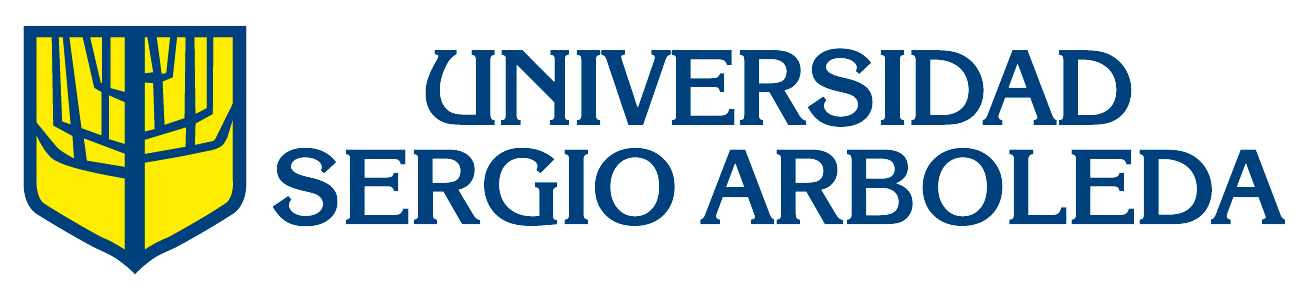


##<ins> **Parcial 1: Aprendizaje de Maquina** </ins>


1. Utilizando el siguiente Dataset:
https://raw.githubusercontent.com/prashant-kikani/breast-cancer-detection/master/breast-cancer-data.csv

1.1 Tomar las 30 primeras muestras del dataset de diabetes y utilizar como variables de entrada: "radius_mean, texture_mean, perimeter_mean"
1.2 Variable a predecir: "diagnosis"


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

In [ ]:
#1
df = pd.read_csv("https://raw.githubusercontent.com/prashant-kikani/breast-cancer-detection/master/breast-cancer-data.csv")

#Ordenar Datos

In [ ]:
#1.1
seleccionarColumnas = ["radius_mean", "texture_mean", "perimeter_mean", "diagnosis"]

subDatosRadius = df[seleccionarColumnas].head(30)
subDatosRadius_ordenado = subDatosRadius.sort_values(by="radius_mean")

subDatosTexture = df[seleccionarColumnas].head(30)
subDatosTexture_ordenado = subDatosTexture.sort_values(by="texture_mean")

subDatosPerimeter = df[seleccionarColumnas].head(30)
subDatosPerimeter_ordenado = subDatosPerimeter.sort_values(by="perimeter_mean")

In [ ]:
subDatosRadius_ordenado1 = subDatosRadius_ordenado.reset_index(drop=True)
total_rows = subDatosRadius_ordenado1.shape[0]
parte_size = total_rows // 3
parte1Radius = subDatosRadius_ordenado1.iloc[:parte_size]
parte2Radius = subDatosRadius_ordenado1.iloc[parte_size: 2 * parte_size]
parte3Radius = subDatosRadius_ordenado1.iloc[2 * parte_size:]
parte12Radius = pd.concat([parte1Radius, parte2Radius])
# print("Tamaño de parte Train:\n", parte12Radius)
# print("--------------\n")
# print("Tamaño de parte Test:\n", parte3Radius)
# print("--------------\n")

In [ ]:
subDatosTexture_ordenado1 = subDatosTexture_ordenado.reset_index(drop=True)
total_rows = subDatosTexture_ordenado1.shape[0]
parte_size = total_rows // 3
parte1Texture = subDatosTexture_ordenado1.iloc[:parte_size]
parte2Texture = subDatosTexture_ordenado1.iloc[parte_size: 2 * parte_size]
parte3Texture = subDatosTexture_ordenado1.iloc[2 * parte_size:]
parte12Texture = pd.concat([parte1Texture, parte2Texture])
# print("Tamaño de parte Train:\n", parte12Texture)
# print("--------------\n")
# print("Tamaño de parte Test:\n", parte3Texture)
# print("--------------\n")

In [ ]:
subDatosPerimeter_ordenado1 = subDatosPerimeter_ordenado.reset_index(drop=True)
total_rows = subDatosPerimeter_ordenado1.shape[0]
parte_size = total_rows // 3
parte1Perimeter = subDatosPerimeter_ordenado1.iloc[:parte_size]
parte2Perimeter = subDatosPerimeter_ordenado1.iloc[parte_size: 2 * parte_size]
parte3Perimeter = subDatosPerimeter_ordenado1.iloc[2 * parte_size:]
parte12Perimeter = pd.concat([parte1Perimeter, parte2Perimeter])
# print("Tamaño de parte Train:\n", parte12Perimeter)
# print("--------------\n")
# print("Tamaño de parte Test:\n", parte3Perimeter)
# print("--------------\n")

##Calcular medias

In [ ]:
medias_texture_mean = [(parte12Texture["texture_mean"].iloc[i] + parte12Texture["texture_mean"].iloc[i+1]) / 2 for i in range(len(parte12Texture)-1)]
medias_texture_mean = [round(media1, 3) for media1 in medias_texture_mean]
print("Medias entre valores de texture_mean en parte12Texture:", medias_texture_mean)

medias_perimeter_mean = [(parte12Perimeter["perimeter_mean"].iloc[i] + parte12Perimeter["perimeter_mean"].iloc[i+1]) / 2 for i in range(len(parte12Perimeter)-1)]
medias_perimeter_mean = [round(media2, 3) for media2 in medias_perimeter_mean]
print("Medias entre valores de perimeter_mean en parte12Perimeter:", medias_perimeter_mean)

medias_radius_mean = [(parte12Radius["radius_mean"].iloc[i] + parte12Radius["radius_mean"].iloc[i+1]) / 2 for i in range(len(parte12Radius)-1)]
medias_radius_mean = [round(media3, 3) for media3 in medias_radius_mean]
print("Medias entre valores de radius_mean en parte12Radius:", medias_radius_mean)

Medias entre valores de texture_mean en parte12Texture: [11.41, 13.35, 14.3, 14.35, 14.705, 15.375, 15.705, 16.055, 17.085, 17.83, 18.935, 20.055, 20.19, 20.315, 20.53, 20.755, 21.04, 21.315, 21.455]
Medias entre valores de perimeter_mean en parte12Perimeter: [68.96, 80.075, 83.27, 84.8, 86.545, 87.48, 88.85, 91.9, 94.17, 95.735, 97.07, 99.905, 102.45, 102.6, 103.15, 103.65, 105.9, 109.05, 112.5]
Medias entre valores de radius_mean en parte12Radius: [10.462, 11.935, 12.455, 12.73, 13.04, 13.31, 13.625, 13.72, 14.135, 14.56, 14.63, 14.99, 15.32, 15.56, 15.815, 15.935, 16.075, 16.39, 16.895]


In [ ]:
def calcular_entropia(c_m, c_b):
    total = c_m + c_b

    p_m = c_m / total if c_m != 0 else 1
    p_b = c_b / total if c_b != 0 else 1

    entropia = 0
    if 0 < p_m < 1:
        entropia -= p_m * np.log2(p_m)
    if 0 < p_b < 1:
        entropia -= p_b * np.log2(p_b)

    return entropia

In [ ]:
entropias_totales_radius = []
for media in medias_radius_mean:
    grupo_menor_igual = parte12Radius[parte12Radius["radius_mean"] <= media]
    grupo_mayor = parte12Radius[parte12Radius["radius_mean"] > media]

    count_m_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("M", 0)
    count_b_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("B", 0)

    count_m_mayor = grupo_mayor["diagnosis"].value_counts().get("M", 0)
    count_b_mayor = grupo_mayor["diagnosis"].value_counts().get("B", 0)

    entropia_menor_igual = calcular_entropia(count_m_menor_igual, count_b_menor_igual)
    entropia_mayor = calcular_entropia(count_m_mayor, count_b_mayor)

    entropia_total = ((count_m_menor_igual + count_b_menor_igual) / parte12Radius.shape[0]) * entropia_menor_igual + \
                     ((count_m_mayor + count_b_mayor) / parte12Radius.shape[0]) * entropia_mayor

    entropias_totales_radius.append(entropia_total)

    # print(f"For media {media}:")
    # print(f"Grupo Menor o Igual - M: {count_m_menor_igual}, B: {count_b_menor_igual}")
    # print(f"Grupo Menor o Igual - Entropía: {entropia_menor_igual:.4f}")
    # print(f"Grupo Mayor - M: {count_m_mayor}, B: {count_b_mayor}")
    # print(f"Grupo Mayor - Entropía: {entropia_mayor:.4f}")
    # print(f"Entropía Total: {entropia_total:.4f}")
    # print("------------------------")
menor_entropia_total_radius = min(entropias_totales_radius)
print(f"\nLa menor Entropía Total en la columna Radius es: {menor_entropia_total_radius:.4f}")


La menor Entropía Total en la columna Radius es: 0.3448


In [ ]:
entropias_totales_texture = []
for media in medias_texture_mean:
    grupo_menor_igual = parte12Texture[parte12Texture["texture_mean"] <= media]
    grupo_mayor = parte12Texture[parte12Texture["texture_mean"] > media]

    count_m_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("M", 0)
    count_b_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("B", 0)

    count_m_mayor = grupo_mayor["diagnosis"].value_counts().get("M", 0)
    count_b_mayor = grupo_mayor["diagnosis"].value_counts().get("B", 0)

    entropia_menor_igual = calcular_entropia(count_m_menor_igual, count_b_menor_igual)
    entropia_mayor = calcular_entropia(count_m_mayor, count_b_mayor)

    entropia_total = ((count_m_menor_igual + count_b_menor_igual) / parte12Texture.shape[0]) * entropia_menor_igual + \
                     ((count_m_mayor + count_b_mayor) / parte12Texture.shape[0]) * entropia_mayor

    entropias_totales_texture.append(entropia_total)

menor_entropia_total_texture = min(entropias_totales_texture)
print(f"\nLa menor Entropía Total en la columna texture es: {menor_entropia_total_texture:.4f}")


La menor Entropía Total en la columna texture es: 0.3818


In [ ]:
entropias_totales_perimeter_1 = []
detalles_entropias_ganadora_1 = {}

for media in medias_perimeter_mean:
    grupo_menor_igual = parte12Perimeter[parte12Perimeter["perimeter_mean"] <= media]
    grupo_mayor = parte12Perimeter[parte12Perimeter["perimeter_mean"] > media]

    count_m_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("M", 0)
    count_b_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("B", 0)

    count_m_mayor = grupo_mayor["diagnosis"].value_counts().get("M", 0)
    count_b_mayor = grupo_mayor["diagnosis"].value_counts().get("B", 0)

    entropia_menor_igual = calcular_entropia(count_m_menor_igual, count_b_menor_igual)
    entropia_mayor = calcular_entropia(count_m_mayor, count_b_mayor)

    entropia_total = ((count_m_menor_igual + count_b_menor_igual) / parte12Perimeter.shape[0]) * entropia_menor_igual + \
                     ((count_m_mayor + count_b_mayor) / parte12Perimeter.shape[0]) * entropia_mayor

    entropias_totales_perimeter_1.append(entropia_total)
    print(f"For media {media}:")
    print(f"Grupo Menor o Igual - M: {count_m_menor_igual}, B: {count_b_menor_igual}")
    print(f"Grupo Menor o Igual - Entropía: {entropia_menor_igual:.4f}")
    print(f"Grupo Mayor - M: {count_m_mayor}, B: {count_b_mayor}")
    print(f"Grupo Mayor - Entropía: {entropia_mayor:.4f}")
    print(f"Entropía Total: {entropia_total:.4f}")
    print("------------------------")

    detalles_entropias_ganadora_1[entropia_total] = {
        "media": media,
        "Grupo Menor o Igual - M": count_m_menor_igual,
        "Grupo Menor o Igual - B": count_b_menor_igual,
        "Grupo Menor o Igual - Entropía": entropia_menor_igual,
        "Grupo Mayor - M": count_m_mayor,
        "Grupo Mayor - B": count_b_mayor,
        "Grupo Mayor - Entropía": entropia_mayor,
        "Entropía Total": entropia_total
    }

menor_entropia_total_perimeter = min(entropias_totales_perimeter_1)
detalles_ganadora_1 = detalles_entropias_ganadora_1[menor_entropia_total_perimeter]


# print(f"For media {detalles_ganadora_1['media']:.4f}:")
# print(f"Grupo Menor o Igual - M: {detalles_ganadora_1['Grupo Menor o Igual - M']}, B: {detalles_ganadora_1['Grupo Menor o Igual - B']}")
# print(f"Grupo Menor o Igual - Entropía: {detalles_ganadora_1['Grupo Menor o Igual - Entropía']:.4f}")
# print(f"Grupo Mayor - M: {detalles_ganadora_1['Grupo Mayor - M']}, B: {detalles_ganadora_1['Grupo Mayor - B']}")
# print(f"Grupo Mayor - Entropía: {detalles_ganadora_1['Grupo Mayor - Entropía']:.4f}")
# print(f"Entropía Total: {detalles_ganadora_1['Entropía Total']:.4f}")

For media 68.96:
Grupo Menor o Igual - M: 0, B: 1
Grupo Menor o Igual - Entropía: 0.0000
Grupo Mayor - M: 17, B: 2
Grupo Mayor - Entropía: 0.4855
Entropía Total: 0.4612
------------------------
For media 80.075:
Grupo Menor o Igual - M: 1, B: 1
Grupo Menor o Igual - Entropía: 1.0000
Grupo Mayor - M: 16, B: 2
Grupo Mayor - Entropía: 0.5033
Entropía Total: 0.5529
------------------------
For media 83.27:
Grupo Menor o Igual - M: 2, B: 1
Grupo Menor o Igual - Entropía: 0.9183
Grupo Mayor - M: 15, B: 2
Grupo Mayor - Entropía: 0.5226
Entropía Total: 0.5819
------------------------
For media 84.8:
Grupo Menor o Igual - M: 3, B: 1
Grupo Menor o Igual - Entropía: 0.8113
Grupo Mayor - M: 14, B: 2
Grupo Mayor - Entropía: 0.5436
Entropía Total: 0.5971
------------------------
For media 86.545:
Grupo Menor o Igual - M: 3, B: 2
Grupo Menor o Igual - Entropía: 0.9710
Grupo Mayor - M: 14, B: 1
Grupo Mayor - Entropía: 0.3534
Entropía Total: 0.5078
------------------------
For media 87.48:
Grupo Menor 

In [ ]:
datosIzquierda_entropia_ganadora_1 = parte12Perimeter[parte12Perimeter["perimeter_mean"] <= detalles_ganadora_1['media']]
datosDerecha_entropia_ganadora_1 = parte12Perimeter[parte12Perimeter["perimeter_mean"] > detalles_ganadora_1['media']]


print(f"Cantidad de datos con media <= {detalles_ganadora_1['media']:.4f}: {len(datosIzquierda_entropia_ganadora_1)}")
print(f"Cantidad de datos con media > {detalles_ganadora_1['media']:.4f}: {len(datosDerecha_entropia_ganadora_1)}")
print(datosIzquierda_entropia_ganadora_1)
print("\n----------------------")
print(datosDerecha_entropia_ganadora_1)

Cantidad de datos con media <= 87.4800: 6
Cantidad de datos con media > 87.4800: 14
   radius_mean  texture_mean  perimeter_mean diagnosis
0        9.504         12.44           60.34         B
1       11.420         20.38           77.58         M
2       12.450         15.70           82.57         M
3       12.460         24.04           83.97         M
4       13.080         15.71           85.63         B
5       13.540         14.36           87.46         B

----------------------
    radius_mean  texture_mean  perimeter_mean diagnosis
6         13.00         21.82           87.50         M
7         13.71         20.83           90.20         M
8         13.73         22.61           93.60         M
9         14.68         20.13           94.74         M
10        14.54         27.54           96.73         M
11        14.58         21.53           97.41         M
12        15.30         25.27          102.40         M
13        15.34         14.26          102.50         M
14 

In [ ]:
ordenar_datosDerecha_entropia_ganadora_1_radius = datosDerecha_entropia_ganadora_1.sort_values(by="radius_mean")
ordenar_datosIzquierda_entropia_ganadora_1_radius = datosIzquierda_entropia_ganadora_1.sort_values(by="radius_mean")

ordenar_datosDerecha_entropia_ganadora_1_texture = datosDerecha_entropia_ganadora_1.sort_values(by="texture_mean")
ordenar_datosIzquierda_entropia_ganadora_1_texture = datosIzquierda_entropia_ganadora_1.sort_values(by="texture_mean")

ordenar_datosDerecha_entropia_ganadora_1_perimeter = datosDerecha_entropia_ganadora_1.sort_values(by="perimeter_mean")
ordenar_datosIzquierda_entropia_ganadora_1_perimeter = datosIzquierda_entropia_ganadora_1.sort_values(by="perimeter_mean")

In [ ]:
media_ganadora_1_radius = [(ordenar_datosIzquierda_entropia_ganadora_1_radius["radius_mean"].iloc[i] + ordenar_datosIzquierda_entropia_ganadora_1_radius["radius_mean"].iloc[i+1]) / 2 for i in range(len(ordenar_datosIzquierda_entropia_ganadora_1_radius)-1)]
media_ganadora_1_radius = [round(media, 3) for media in media_ganadora_1_radius]

media_ganadora_1_texture = [(ordenar_datosIzquierda_entropia_ganadora_1_texture["texture_mean"].iloc[i] + ordenar_datosIzquierda_entropia_ganadora_1_texture["texture_mean"].iloc[i+1]) / 2 for i in range(len(ordenar_datosIzquierda_entropia_ganadora_1_texture)-1)]
media_ganadora_1_texture = [round(media, 3) for media in media_ganadora_1_texture]

media_ganadora_1_perimeter = [(ordenar_datosIzquierda_entropia_ganadora_1_perimeter["perimeter_mean"].iloc[i] + ordenar_datosIzquierda_entropia_ganadora_1_perimeter["perimeter_mean"].iloc[i+1]) / 2 for i in range(len(ordenar_datosIzquierda_entropia_ganadora_1_perimeter)-1)]
media_ganadora_1_perimeter = [round(media, 3) for media in media_ganadora_1_perimeter]

In [ ]:
# ordenar_datosDerecha_entropia_ganadora_1_radius = datosDerecha_entropia_ganadora_1.sort_values(by="radius_mean")
# ordenar_datosDerecha_entropia_ganadora_1_radius

# media_ganadora_1_radius = [(ordenar_datosDerecha_entropia_ganadora_1_radius["radius_mean"].iloc[i] + ordenar_datosDerecha_entropia_ganadora_1_radius["radius_mean"].iloc[i+1]) / 2 for i in range(len(ordenar_datosDerecha_entropia_ganadora_1_radius)-1)]
# media_ganadora_1_radius = [round(media, 3) for media in media_ganadora_1_radius]
# # print("Medias entre valores de radius_mean en ordenar_datosDerecha_entropia_ganadora_1_radius:", media_ganadora_1_radius)

# entropias_totales_radius_ganadora_1 = []
# for media in media_ganadora_1_radius:
#     grupo_menor_igual = ordenar_datosDerecha_entropia_ganadora_1_radius[ordenar_datosDerecha_entropia_ganadora_1_radius["radius_mean"] <= media]
#     grupo_mayor = ordenar_datosDerecha_entropia_ganadora_1_radius[ordenar_datosDerecha_entropia_ganadora_1_radius["radius_mean"] > media]

#     count_m_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("M", 0)
#     count_b_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("B", 0)

#     count_m_mayor = grupo_mayor["diagnosis"].value_counts().get("M", 0)
#     count_b_mayor = grupo_mayor["diagnosis"].value_counts().get("B", 0)

#     entropia_menor_igual = calcular_entropia(count_m_menor_igual, count_b_menor_igual)
#     entropia_mayor = calcular_entropia(count_m_mayor, count_b_mayor)

#     entropia_total = ((count_m_menor_igual + count_b_menor_igual) / ordenar_datosDerecha_entropia_ganadora_1_radius.shape[0]) * entropia_menor_igual + \
#                      ((count_m_mayor + count_b_mayor) / ordenar_datosDerecha_entropia_ganadora_1_radius.shape[0]) * entropia_mayor

#     entropias_totales_radius_ganadora_1.append(entropia_total)

#     # print(f"For media {media}:")
#     # print(f"Grupo Menor o Igual - M: {count_m_menor_igual}, B: {count_b_menor_igual}")
#     # print(f"Grupo Menor o Igual - Entropía: {entropia_menor_igual:.4f}")
#     # print(f"Grupo Mayor - M: {count_m_mayor}, B: {count_b_mayor}")
#     # print(f"Grupo Mayor - Entropía: {entropia_mayor:.4f}")
#     # print(f"Entropía Total: {entropia_total:.4f}")
#     # print("------------------------")
# menor_entropia_total_radius = min(entropias_totales_radius_ganadora_1)
# print(f"\nLa menor Entropía Total en la columna Radius es: {menor_entropia_total_radius:.4f}")

In [ ]:
entropias_totales_texture_ganadora_1 = []
for media in media_ganadora_1_texture:
    grupo_menor_igual = ordenar_datosIzquierda_entropia_ganadora_1_texture[ordenar_datosIzquierda_entropia_ganadora_1_texture["texture_mean"] <= media]
    grupo_mayor = ordenar_datosIzquierda_entropia_ganadora_1_texture[ordenar_datosIzquierda_entropia_ganadora_1_texture["texture_mean"] > media]

    count_m_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("M", 0)
    count_b_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("B", 0)

    count_m_mayor = grupo_mayor["diagnosis"].value_counts().get("M", 0)
    count_b_mayor = grupo_mayor["diagnosis"].value_counts().get("B", 0)

    entropia_menor_igual = calcular_entropia(count_m_menor_igual, count_b_menor_igual)
    entropia_mayor = calcular_entropia(count_m_mayor, count_b_mayor)

    entropia_total = ((count_m_menor_igual + count_b_menor_igual) / ordenar_datosIzquierda_entropia_ganadora_1_texture.shape[0]) * entropia_menor_igual + \
                     ((count_m_mayor + count_b_mayor) / ordenar_datosIzquierda_entropia_ganadora_1_texture.shape[0]) * entropia_mayor

    entropias_totales_texture_ganadora_1.append(entropia_total)

    # print(f"For media {media}:")
    # print(f"Grupo Menor o Igual - M: {count_m_menor_igual}, B: {count_b_menor_igual}")
    # print(f"Grupo Menor o Igual - Entropía: {entropia_menor_igual:.4f}")
    # print(f"Grupo Mayor - M: {count_m_mayor}, B: {count_b_mayor}")
    # print(f"Grupo Mayor - Entropía: {entropia_mayor:.4f}")
    # print(f"Entropía Total: {entropia_total:.4f}")
    # print("------------------------")
menor_entropia_total_texture = min(entropias_totales_texture_ganadora_1)
print(f"\nLa menor Entropía Total en la columna texture es: {menor_entropia_total_texture:.4f}")


La menor Entropía Total en la columna texture es: 0.5409


In [ ]:
entropias_totales_perimeter_ganadora_1 = []
for media in media_ganadora_1_perimeter:
    grupo_menor_igual = ordenar_datosIzquierda_entropia_ganadora_1_perimeter[ordenar_datosIzquierda_entropia_ganadora_1_perimeter["perimeter_mean"] <= media]
    grupo_mayor = ordenar_datosIzquierda_entropia_ganadora_1_perimeter[ordenar_datosIzquierda_entropia_ganadora_1_perimeter["perimeter_mean"] > media]

    count_m_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("M", 0)
    count_b_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("B", 0)

    count_m_mayor = grupo_mayor["diagnosis"].value_counts().get("M", 0)
    count_b_mayor = grupo_mayor["diagnosis"].value_counts().get("B", 0)

    entropia_menor_igual = calcular_entropia(count_m_menor_igual, count_b_menor_igual)
    entropia_mayor = calcular_entropia(count_m_mayor, count_b_mayor)

    entropia_total = ((count_m_menor_igual + count_b_menor_igual) / ordenar_datosIzquierda_entropia_ganadora_1_perimeter.shape[0]) * entropia_menor_igual + \
                     ((count_m_mayor + count_b_mayor) / ordenar_datosIzquierda_entropia_ganadora_1_perimeter.shape[0]) * entropia_mayor

    entropias_totales_perimeter_ganadora_1.append(entropia_total)

    # print(f"For media {media}:")
    # print(f"Grupo Menor o Igual - M: {count_m_menor_igual}, B: {count_b_menor_igual}")
    # print(f"Grupo Menor o Igual - Entropía: {entropia_menor_igual:.4f}")
    # print(f"Grupo Mayor - M: {count_m_mayor}, B: {count_b_mayor}")
    # print(f"Grupo Mayor - Entropía: {entropia_mayor:.4f}")
    # print(f"Entropía Total: {entropia_total:.4f}")
    # print("------------------------")
menor_entropia_total_texture = min(entropias_totales_perimeter_ganadora_1)
print(f"\nLa menor Entropía Total en la columna texture es: {menor_entropia_total_texture:.4f}")


La menor Entropía Total en la columna texture es: 0.5409


In [ ]:
entropias_totales_radius_ganadora_2 = []
detalles_entropias_ganadora_2 = {}


for media in media_ganadora_1_radius:
    grupo_menor_igual = ordenar_datosIzquierda_entropia_ganadora_1_radius[ordenar_datosIzquierda_entropia_ganadora_1_radius["radius_mean"] <= media]
    grupo_mayor = ordenar_datosIzquierda_entropia_ganadora_1_radius[ordenar_datosIzquierda_entropia_ganadora_1_radius["radius_mean"] > media]

    count_m_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("M", 0)
    count_b_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("B", 0)

    count_m_mayor = grupo_mayor["diagnosis"].value_counts().get("M", 0)
    count_b_mayor = grupo_mayor["diagnosis"].value_counts().get("B", 0)

    entropia_menor_igual = calcular_entropia(count_m_menor_igual, count_b_menor_igual)
    entropia_mayor = calcular_entropia(count_m_mayor, count_b_mayor)

    entropia_total = ((count_m_menor_igual + count_b_menor_igual) / ordenar_datosIzquierda_entropia_ganadora_1_radius.shape[0]) * entropia_menor_igual + \
                     ((count_m_mayor + count_b_mayor) / ordenar_datosIzquierda_entropia_ganadora_1_radius.shape[0]) * entropia_mayor

    entropias_totales_radius_ganadora_2.append(entropia_total)

    detalles_entropias_ganadora_2[entropia_total] = {
        "media": media,
        "Grupo Menor o Igual - M": count_m_menor_igual,
        "Grupo Menor o Igual - B": count_b_menor_igual,
        "Grupo Menor o Igual - Entropía": entropia_menor_igual,
        "Grupo Mayor - M": count_m_mayor,
        "Grupo Mayor - B": count_b_mayor,
        "Grupo Mayor - Entropía": entropia_mayor,
        "Entropía Total": entropia_total
    }

menor_entropia_total_perimeter = min(entropias_totales_radius_ganadora_2)
detalles_ganadora_2 = detalles_entropias_ganadora_2[menor_entropia_total_perimeter]


print(f"For media {detalles_ganadora_2['media']:.4f}:")
print(f"Grupo Menor o Igual - M: {detalles_ganadora_2['Grupo Menor o Igual - M']}, B: {detalles_ganadora_2['Grupo Menor o Igual - B']}")
print(f"Grupo Menor o Igual - Entropía: {detalles_ganadora_2['Grupo Menor o Igual - Entropía']:.4f}")
print(f"Grupo Mayor - M: {detalles_ganadora_2['Grupo Mayor - M']}, B: {detalles_ganadora_2['Grupo Mayor - B']}")
print(f"Grupo Mayor - Entropía: {detalles_ganadora_2['Grupo Mayor - Entropía']:.4f}")
print(f"Entropía Total: {detalles_ganadora_2['Entropía Total']:.4f}")

For media 12.7700:
Grupo Menor o Igual - M: 3, B: 1
Grupo Menor o Igual - Entropía: 0.8113
Grupo Mayor - M: 0, B: 2
Grupo Mayor - Entropía: 0.0000
Entropía Total: 0.5409


In [ ]:
datosIzquierda_entropia_ganadora_2 = parte12Radius[parte12Radius["radius_mean"] <= detalles_ganadora_2['media']]
datosDerecha_entropia_ganadora_2 = parte12Radius[parte12Radius["radius_mean"] > detalles_ganadora_2['media']]


print(f"Cantidad de datos con media <= {detalles_ganadora_2['media']:.4f}: {len(datosIzquierda_entropia_ganadora_2)}")

Cantidad de datos con media <= 12.7700: 4


In [ ]:
ordenar_datosDerecha_entropia_ganadora_2_radius = datosDerecha_entropia_ganadora_2.sort_values(by="radius_mean")
ordenar_datosIzquierda_entropia_ganadora_2_radius = datosIzquierda_entropia_ganadora_2.sort_values(by="radius_mean")

ordenar_datosDerecha_entropia_ganadora_2_texture = datosDerecha_entropia_ganadora_2.sort_values(by="texture_mean")
ordenar_datosIzquierda_entropia_ganadora_2_texture = datosIzquierda_entropia_ganadora_2.sort_values(by="texture_mean")

ordenar_datosDerecha_entropia_ganadora_2_perimeter = datosDerecha_entropia_ganadora_2.sort_values(by="perimeter_mean")
ordenar_datosIzquierda_entropia_ganadora_2_perimeter = datosIzquierda_entropia_ganadora_2.sort_values(by="perimeter_mean")

In [ ]:
media_ganadora_2_radius = [(ordenar_datosIzquierda_entropia_ganadora_2_radius["radius_mean"].iloc[i] + ordenar_datosIzquierda_entropia_ganadora_2_radius["radius_mean"].iloc[i+1]) / 2 for i in range(len(ordenar_datosIzquierda_entropia_ganadora_2_radius)-1)]
media_ganadora_2_radius = [round(media, 3) for media in media_ganadora_2_radius]

media_ganadora_2_texture = [(ordenar_datosIzquierda_entropia_ganadora_2_texture["texture_mean"].iloc[i] + ordenar_datosIzquierda_entropia_ganadora_2_texture["texture_mean"].iloc[i+1]) / 2 for i in range(len(ordenar_datosIzquierda_entropia_ganadora_2_texture)-1)]
media_ganadora_2_texture = [round(media, 3) for media in media_ganadora_2_texture]

media_ganadora_2_perimeter = [(ordenar_datosIzquierda_entropia_ganadora_2_perimeter["perimeter_mean"].iloc[i] + ordenar_datosIzquierda_entropia_ganadora_2_perimeter["perimeter_mean"].iloc[i+1]) / 2 for i in range(len(ordenar_datosIzquierda_entropia_ganadora_2_perimeter)-1)]
media_ganadora_2_perimeter = [round(media, 3) for media in media_ganadora_2_perimeter]

In [ ]:
entropias_totales_radius_ganadora_2 = []
for media in media_ganadora_2_texture:
    grupo_menor_igual = ordenar_datosIzquierda_entropia_ganadora_2_radius[ordenar_datosIzquierda_entropia_ganadora_2_radius["radius_mean"] <= media]
    grupo_mayor = ordenar_datosIzquierda_entropia_ganadora_2_radius[ordenar_datosIzquierda_entropia_ganadora_2_radius["radius_mean"] > media]

    count_m_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("M", 0)
    count_b_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("B", 0)

    count_m_mayor = grupo_mayor["diagnosis"].value_counts().get("M", 0)
    count_b_mayor = grupo_mayor["diagnosis"].value_counts().get("B", 0)

    entropia_menor_igual = calcular_entropia(count_m_menor_igual, count_b_menor_igual)
    entropia_mayor = calcular_entropia(count_m_mayor, count_b_mayor)

    entropia_total = ((count_m_menor_igual + count_b_menor_igual) / ordenar_datosIzquierda_entropia_ganadora_2_radius.shape[0]) * entropia_menor_igual + \
                     ((count_m_mayor + count_b_mayor) / ordenar_datosIzquierda_entropia_ganadora_2_radius.shape[0]) * entropia_mayor

    entropias_totales_radius_ganadora_2.append(entropia_total)

    # print(f"For media {media}:")
    # print(f"Grupo Menor o Igual - M: {count_m_menor_igual}, B: {count_b_menor_igual}")
    # print(f"Grupo Menor o Igual - Entropía: {entropia_menor_igual:.4f}")
    # print(f"Grupo Mayor - M: {count_m_mayor}, B: {count_b_mayor}")
    # print(f"Grupo Mayor - Entropía: {entropia_mayor:.4f}")
    # print(f"Entropía Total: {entropia_total:.4f}")
    # print("------------------------")
menor_entropia_total_texture = min(entropias_totales_radius_ganadora_2)
print(f"\nLa menor Entropía Total en la columna radius es: {menor_entropia_total_texture:.4f}")


La menor Entropía Total en la columna radius es: 0.8113


In [ ]:
entropias_totales_perimeter_ganadora_2 = []
for media in media_ganadora_2_texture:
    grupo_menor_igual = ordenar_datosIzquierda_entropia_ganadora_2_perimeter[ordenar_datosIzquierda_entropia_ganadora_2_perimeter["perimeter_mean"] <= media]
    grupo_mayor = ordenar_datosIzquierda_entropia_ganadora_2_perimeter[ordenar_datosIzquierda_entropia_ganadora_2_perimeter["perimeter_mean"] > media]

    count_m_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("M", 0)
    count_b_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("B", 0)

    count_m_mayor = grupo_mayor["diagnosis"].value_counts().get("M", 0)
    count_b_mayor = grupo_mayor["diagnosis"].value_counts().get("B", 0)

    entropia_menor_igual = calcular_entropia(count_m_menor_igual, count_b_menor_igual)
    entropia_mayor = calcular_entropia(count_m_mayor, count_b_mayor)

    entropia_total = ((count_m_menor_igual + count_b_menor_igual) / ordenar_datosIzquierda_entropia_ganadora_2_perimeter.shape[0]) * entropia_menor_igual + \
                     ((count_m_mayor + count_b_mayor) / ordenar_datosIzquierda_entropia_ganadora_2_perimeter.shape[0]) * entropia_mayor

    entropias_totales_perimeter_ganadora_2.append(entropia_total)

    # print(f"For media {media}:")
    # print(f"Grupo Menor o Igual - M: {count_m_menor_igual}, B: {count_b_menor_igual}")
    # print(f"Grupo Menor o Igual - Entropía: {entropia_menor_igual:.4f}")
    # print(f"Grupo Mayor - M: {count_m_mayor}, B: {count_b_mayor}")
    # print(f"Grupo Mayor - Entropía: {entropia_mayor:.4f}")
    # print(f"Entropía Total: {entropia_total:.4f}")
    # print("------------------------")
menor_entropia_total_texture = min(entropias_totales_perimeter_ganadora_2)
print(f"\nLa menor Entropía Total en la columna perimeter es: {menor_entropia_total_texture:.4f}")


La menor Entropía Total en la columna perimeter es: 0.8113


In [ ]:
entropias_totales_texture_ganadora_3 = []
detalles_entropias_ganadora_3 = {}


for media in media_ganadora_2_texture:
    grupo_menor_igual = ordenar_datosIzquierda_entropia_ganadora_2_texture[ordenar_datosIzquierda_entropia_ganadora_2_texture["texture_mean"] <= media]
    grupo_mayor = ordenar_datosIzquierda_entropia_ganadora_2_texture[ordenar_datosIzquierda_entropia_ganadora_2_texture["texture_mean"] > media]

    count_m_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("M", 0)
    count_b_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("B", 0)

    count_m_mayor = grupo_mayor["diagnosis"].value_counts().get("M", 0)
    count_b_mayor = grupo_mayor["diagnosis"].value_counts().get("B", 0)

    entropia_menor_igual = calcular_entropia(count_m_menor_igual, count_b_menor_igual)
    entropia_mayor = calcular_entropia(count_m_mayor, count_b_mayor)

    entropia_total = ((count_m_menor_igual + count_b_menor_igual) / ordenar_datosIzquierda_entropia_ganadora_2_texture.shape[0]) * entropia_menor_igual + \
                     ((count_m_mayor + count_b_mayor) / ordenar_datosIzquierda_entropia_ganadora_2_texture.shape[0]) * entropia_mayor

    entropias_totales_texture_ganadora_3.append(entropia_total)
    print(f"For media {media}:")
    print(f"Grupo Menor o Igual - M: {count_m_menor_igual}, B: {count_b_menor_igual}")
    print(f"Grupo Menor o Igual - Entropía: {entropia_menor_igual:.4f}")
    print(f"Grupo Mayor - M: {count_m_mayor}, B: {count_b_mayor}")
    print(f"Grupo Mayor - Entropía: {entropia_mayor:.4f}")
    print(f"Entropía Total: {entropia_total:.4f}")
    print("------------------------")
    detalles_entropias_ganadora_3[entropia_total] = {
        "media": media,
        "Grupo Menor o Igual - M": count_m_menor_igual,
        "Grupo Menor o Igual - B": count_b_menor_igual,
        "Grupo Menor o Igual - Entropía": entropia_menor_igual,
        "Grupo Mayor - M": count_m_mayor,
        "Grupo Mayor - B": count_b_mayor,
        "Grupo Mayor - Entropía": entropia_mayor,
        "Entropía Total": entropia_total
    }

menor_entropia_total_perimeter = min(entropias_totales_texture_ganadora_3)
detalles_ganadora_3 = detalles_entropias_ganadora_3[menor_entropia_total_perimeter]


# print(f"For media {detalles_ganadora_3['media']:.4f}:")
# print(f"Grupo Menor o Igual - M: {detalles_ganadora_3['Grupo Menor o Igual - M']}, B: {detalles_ganadora_3['Grupo Menor o Igual - B']}")
# print(f"Grupo Menor o Igual - Entropía: {detalles_ganadora_3['Grupo Menor o Igual - Entropía']:.4f}")
# print(f"Grupo Mayor - M: {detalles_ganadora_3['Grupo Mayor - M']}, B: {detalles_ganadora_3['Grupo Mayor - B']}")
# print(f"Grupo Mayor - Entropía: {detalles_ganadora_3['Grupo Mayor - Entropía']:.4f}")
# print(f"Entropía Total: {detalles_ganadora_3['Entropía Total']:.4f}")

For media 14.07:
Grupo Menor o Igual - M: 0, B: 1
Grupo Menor o Igual - Entropía: 0.0000
Grupo Mayor - M: 3, B: 0
Grupo Mayor - Entropía: 0.0000
Entropía Total: 0.0000
------------------------
For media 18.04:
Grupo Menor o Igual - M: 1, B: 1
Grupo Menor o Igual - Entropía: 1.0000
Grupo Mayor - M: 2, B: 0
Grupo Mayor - Entropía: 0.0000
Entropía Total: 0.5000
------------------------
For media 22.21:
Grupo Menor o Igual - M: 2, B: 1
Grupo Menor o Igual - Entropía: 0.9183
Grupo Mayor - M: 1, B: 0
Grupo Mayor - Entropía: 0.0000
Entropía Total: 0.6887
------------------------


#*Comprobar*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

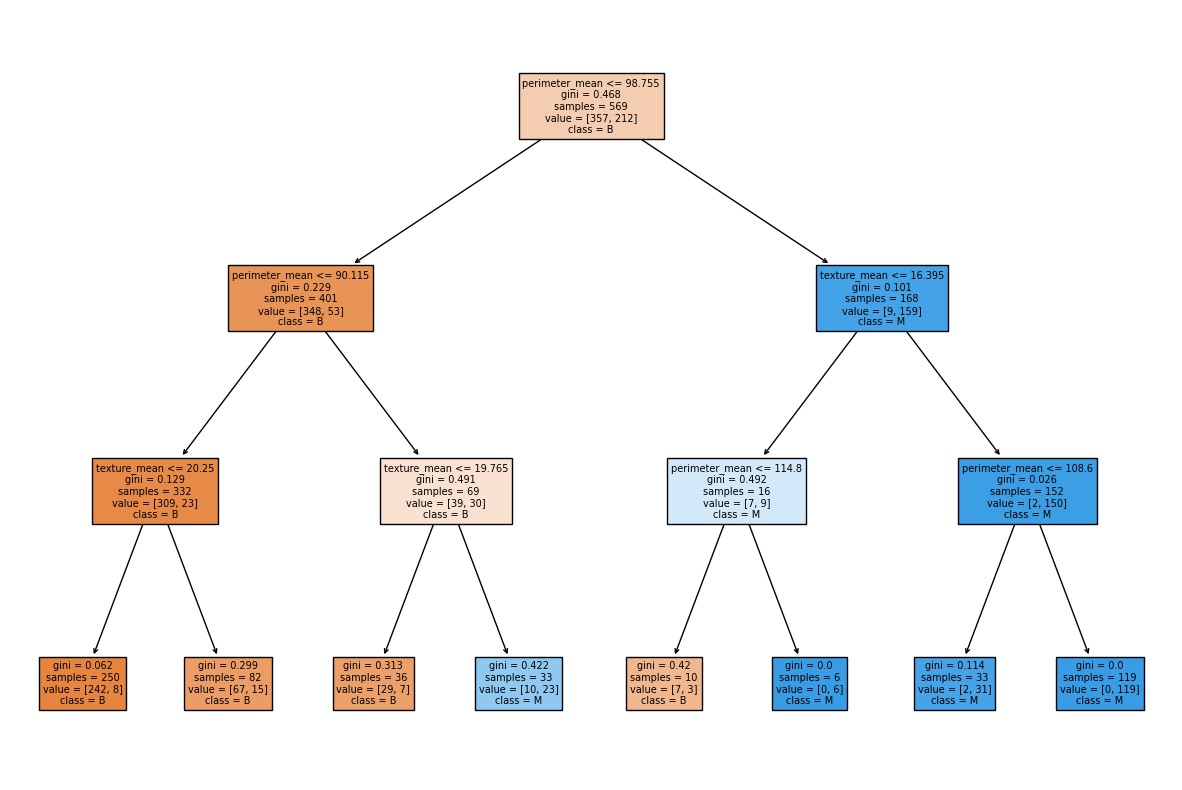

In [ ]:
df3 = df.sort_values(by="perimeter_mean")
x = df3[['radius_mean', 'texture_mean', 'perimeter_mean']].copy()
y = df3[['diagnosis']].copy()
model=DecisionTreeClassifier(max_depth=3)
model.fit(x,y)
plt.figure(figsize=(15, 10))
tree.plot_tree(model, feature_names=['radius_mean', 'texture_mean', 'perimeter_mean'], class_names=['B', 'M'], filled=True)
plt.show()

#C. Dibujar frontera

#Parte 2: